In [2]:
import pandas as pd
import os
import xml.etree.ElementTree as ET


In [3]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_columns = None

ABRIMOS Y EXPLORAMOS LOS .CSV

In [5]:
def propiedades(df):
    print("El índice es", df.index)
    print('----------------------')
    print("La forma es", df.shape)
    print('----------------------')
    print("El tamaño es", df.size)
    print('----------------------')
    print("El tipo de dato es", df.dtypes)
 


In [6]:
def eliminar_columnas(df):

    columnas_eliminadas = []
    patron = 'Q8|Q10|Q11|Q12|Q13|Q15|Q17|Q18|Q20|Q26|Q27_A|Q28|Q29|Q32_A|Q34_A|Q35|Q36_A|Q38_A|Q27_B|Q29_B|Q34_B|Q36_B|Q38_B'

    for col in df.columns:
        if re.findall(patron,col):
            columnas_eliminadas.append(col)
            
    eliminado = df.drop(columnas_eliminadas, axis=1)
    return eliminado 



ABRIMOS Y EXPLORAMOS EL TXT

In [7]:
data_txt = pd.read_csv('../datos_modificados/data_txt_clean.txt', sep= ';')
data_txt.head(2)
    

,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
0,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN


In [8]:
data_txt.columns

Index(['index', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13', 'Q15', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q25', 'Q26', 'Q33', 'Q35', 'Q41', 'Q7', 'Q9',
       'Q12', 'Q14', 'Q16', 'Q17', 'Q24', 'Q32', 'Q34'],
      dtype='object')

ABRIMOS Y EXPLORAMOS EL XML

In [9]:
data_xml = pd.read_xml('../datos_modificados/data_xml_clean.xml')
data_xml.sample(5)

,level_0,index,time,age,gender
23536,23536,23536,418,18-21,Man
16300,16300,16300,1419,30-34,Man
1200,1200,1200,573,22-24,Man
17183,17183,17183,390,18-21,Man
16087,16087,16087,350,40-44,Woman


In [10]:
eliminar_columnas(data_txt)

,index,Q3,Q4,Q5,Q6,Q21,Q22,Q23,Q25,Q33,Q41,Q7,Q9,Q14,Q16,Q24,Q32,Q34
0,0,India,Bachelor’s degree,Other,5-10 years,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret",None of these activities are an important par...,PostgreSQL,None
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,Build and/or run the data infrastructure that...,NaN,NaN
2,2,Pakistan,Master’s degree,Software Engineer,1-3 years,"1000-9,999 employees",0,I do not know,$0-999,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,None of these activities are an important par...,"MySQL , MongoDB",None
3,3,Mexico,Doctoral degree,Research Scientist,20+ years,"1000-9,999 employees",0,I do not know,"30,000-39,999",NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras",Do research that advances the state of the ar...,NaN,NaN
4,4,India,Doctoral degree,Other,< 1 years,50-249 employees,5-9,We use ML methods for generating insights (but...,"30,000-39,999",NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM",Analyze and understand data to influence produ...,None,Microsoft Power BI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,Egypt,Bachelor’s degree,Data Analyst,1-3 years,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,"15,000-19,999",MongoDB,"Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn","Scikit-learn , TensorFlow ,Keras ,PyTorch ,Xgb...",Analyze and understand data to influence produ...,"PostgreSQL , SQLite , MongoDB , Microsoft SQL...",Microsoft Power BI
25969,25969,China,Master’s degree,Student,1-3 years,NaN,NaN,NaN,NaN,NaN,NaN,Python,PyCharm,None,PyTorch,NaN,NaN,NaN
25970,25970,Sweden,Doctoral degree,Research Scientist,I have never written code,"1000-9,999 employees",20+,I do not know,$0-999,NaN,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,NaN,None of these activities are an important par...,NaN,NaN
25971,25971,United States of America,Master’s degree,Data Scientist,5-10 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",NaN,NaN,NaN,"Python, SQL","Notepad++,Jupyter Notebook","Matplotlib ,Seaborn",Scikit-learn,NaN,NaN,NaN


In [11]:
eliminar_columnas(data_xml)

,level_0,index,time,age,gender
0,0,0,910,50-54,Man
1,1,1,784,50-54,Man
2,2,2,924,22-24,Man
3,3,3,575,45-49,Man
4,4,4,781,45-49,Man
...,...,...,...,...,...
25968,25968,25968,1756,30-34,Man
25969,25969,25969,253,22-24,Man
25970,25970,25970,494,50-54,Man
25971,25971,25971,277,45-49,Man


In [12]:
propiedades(data_txt)

El índice es RangeIndex(start=0, stop=25973, step=1)
----------------------
La forma es (25973, 27)
----------------------
El tamaño es 701271
----------------------
El tipo de dato es index     int64
Q3       object
Q4       object
Q5       object
Q6       object
Q8       object
Q11      object
Q13      object
Q15      object
Q20      object
Q21      object
Q22      object
Q23      object
Q25      object
Q26      object
Q33      object
Q35      object
Q41      object
Q7       object
Q9       object
Q12      object
Q14      object
Q16      object
Q17      object
Q24      object
Q32      object
Q34      object
dtype: object


In [13]:
propiedades(data_xml)

El índice es RangeIndex(start=0, stop=25973, step=1)
----------------------
La forma es (25973, 5)
----------------------
El tamaño es 129865
----------------------
El tipo de dato es level_0     int64
index       int64
time        int64
age        object
gender     object
dtype: object


In [14]:
data_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   25973 non-null  int64 
 1   Q3      25973 non-null  object
 2   Q4      25973 non-null  object
 3   Q5      25973 non-null  object
 4   Q6      25973 non-null  object
 5   Q8      24829 non-null  object
 6   Q11     24461 non-null  object
 7   Q13     24403 non-null  object
 8   Q15     23754 non-null  object
 9   Q20     16325 non-null  object
 10  Q21     16251 non-null  object
 11  Q22     16126 non-null  object
 12  Q23     15952 non-null  object
 13  Q25     15391 non-null  object
 14  Q26     15183 non-null  object
 15  Q33     4656 non-null   object
 16  Q35     2237 non-null   object
 17  Q41     18489 non-null  object
 18  Q7      24941 non-null  object
 19  Q9      24934 non-null  object
 20  Q12     24582 non-null  object
 21  Q14     23970 non-null  object
 22  Q16     19624 non-null

In [15]:
data_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  25973 non-null  int64 
 1   index    25973 non-null  int64 
 2   time     25973 non-null  int64 
 3   age      25973 non-null  object
 4   gender   25973 non-null  object
dtypes: int64(3), object(2)
memory usage: 1014.7+ KB


In [16]:
data_txt.set_index(["index"], inplace = True)

In [17]:
data_xml.set_index(["index"], inplace = True)

In [18]:
tabla_completa = data_xml.join(data_txt, on ="index")

In [19]:
tabla_completa.sample(1)

,level_0,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9631,9631,730,22-24,Woman,South Korea,Bachelor’s degree,Student,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_join.drop(["level_0","time"], axis = 1, inplace = True)
df_join.head()

NameError: name 'df_join' is not defined

In [21]:
tabla_completa["Q33"].unique

<bound method Series.unique of index
0             NaN
1             NaN
2          MySQL 
3             NaN
4             NaN
           ...   
25968    MongoDB 
25969         NaN
25970         NaN
25971         NaN
25972         NaN
Name: Q33, Length: 25973, dtype: object>

In [22]:
tabla_completa["Q33"].isnull().sum()

21317

In [23]:
tabla_completa.isnull().sum()

level_0        0
time           0
age            0
gender         0
Q3             0
Q4             0
Q5             0
Q6             0
Q8          1144
Q11         1512
Q13         1570
Q15         2219
Q20         9648
Q21         9722
Q22         9847
Q23        10021
Q25        10582
Q26        10790
Q33        21317
Q35        23736
Q41         7484
Q7          1032
Q9          1039
Q12         1391
Q14         2003
Q16         6349
Q17         6658
Q24        10338
Q32        16489
Q34        16574
dtype: int64

# Pregunta 1: 
¿ Existe brecha de género en el sector de Data?

¿Hay más mujeres u hombres en el sector Dana Analyst?

In [24]:
tabla_completa.head(1)

,level_0,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None


In [25]:
tabla_completa['gender'].unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

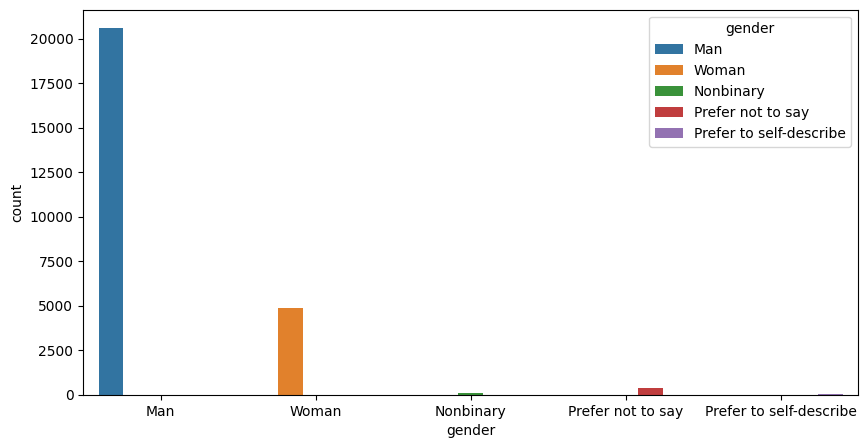

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = tabla_completa, hue = 'gender');

In [30]:
df_woman = tabla_completa[tabla_completa["gender"] == "Woman"]
df_woman.head()

,level_0,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,5,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,A laptop,2-5 times,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,PyTorch ,Fas...","Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN
6,6,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,Python,A laptop,Never,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"C++, Java, Javascript","Visual Studio ,Visual Studio Code (VSCode) ,Ju...",None,Geoplotlib,Fast.ai,NaN,NaN,NaN,NaN
11,11,3081,18-21,Woman,India,Master’s degree,Student,< 1 years,R,A laptop,Never,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","Python, R, C++","RStudio ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2",Scikit-learn,Linear or Logistic Regression,NaN,NaN,NaN
12,12,1922,18-21,Woman,India,Master’s degree,Student,< 1 years,Python,A laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Python, MATLAB","RStudio ,MATLAB ,Jupyter Notebook",NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,21,551,25-29,Woman,Turkey,Bachelor’s degree,Data Scientist,3-5 years,R,A personal computer / desktop,Once,< 1 year,Computers/Technology,"10,000 or more employees",20+,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,IBM Db2,NaN,"Advanced statistical software (SPSS, SAS, etc.)","Python, R, SQL, C++","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,Xgboost","Linear or Logistic Regression, Gradient Boosti...",Build and/or run the data infrastructure that...,"Oracle Database , MongoDB , IBM Db2",None


In [31]:
df_woman["age"].unique()

array(['25-29', '18-21', '22-24', '30-34', '35-39', '40-44', '70+',
       '55-59', '45-49', '50-54', '60-69'], dtype=object)

In [48]:
df_edad = df_woman["age"].value_counts().reset_index()
df_edad

,age,count
0,18-21,1117
1,25-29,994
2,22-24,963
3,30-34,618
4,35-39,455
5,40-44,317
6,45-49,175
7,50-54,136
8,55-59,72
9,60-69,35


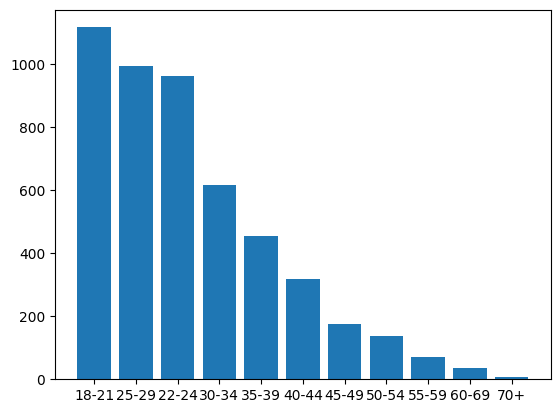

In [36]:
plt.bar(x = df_edad["age"], height = df_edad["count"]);

In [44]:
df_man = tabla_completa[tabla_completa["gender"] == "Man"]
df_man.head()

,level_0,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN
2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,$0-999,$0 ($USD),MySQL,NaN,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,"MySQL , MongoDB",None
3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,NaN
4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,"30,000-39,999","$1000-$9,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,None,Microsoft Power BI


In [45]:
df_man["age"].unique()

array(['50-54', '22-24', '45-49', '30-34', '40-44', '35-39', '18-21',
       '70+', '25-29', '55-59', '60-69'], dtype=object)

In [52]:
df_edad2 = df_man["age"].value_counts().reset_index().sort_values(by = ["age"])
df_edad2

,age,count
1,18-21,3696
2,22-24,3643
0,25-29,3859
3,30-34,2765
4,35-39,1993
5,40-44,1537
6,45-49,1171
7,50-54,811
8,55-59,509
9,60-69,504


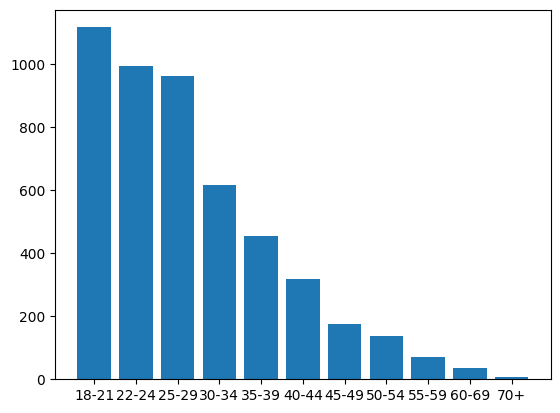

In [53]:
plt.bar(x = df_edad2["age"], height = df_edad["count"]);